In [ ]:
import pandas as pd
import numpy as np 

In [ ]:
image_columns = [f"pixel{i}" for i in range(1, 785)]
label_column = "label"

In [ ]:
train = pd.read_csv("/content/drive/MyDrive/sign_mnist_train.csv")
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [ ]:
train_images = np.array(train[image_columns]).reshape((-1, 28, 28, 1))
train_images = train_images / 255.0
train_images.shape

(27455, 28, 28, 1)

In [ ]:
test = pd.read_csv("/content/drive/MyDrive/sign_mnist_test.csv")
test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53


In [ ]:
test_images = np.array(test[image_columns]).reshape((-1, 28, 28, 1))
test_images = test_images / 255.0
test_images.shape

(7172, 28, 28, 1)

In [ ]:
labels = sorted(train[label_column].unique())
label_index = dict([(label, i) for i, label in enumerate(labels)])
print(label_index)

{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 10: 9, 11: 10, 12: 11, 13: 12, 14: 13, 15: 14, 16: 15, 17: 16, 18: 17, 19: 18, 20: 19, 21: 20, 22: 21, 23: 22, 24: 23}


In [ ]:
train_labels = np.array([label_index[label] for label in train[label_column]])
train_labels.shape

(27455,)

In [ ]:
test_labels = np.array([label_index[label] for label in test[label_column]])
test_labels.shape

(7172,)

## Modeling

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import cv2

In [ ]:
model = keras.Sequential([
    layers.Input((28, 28, 1)),
    layers.Conv2D(32, 3, activation="relu", padding="same"),
    layers.MaxPooling2D(),
    layers.BatchNormalization(),
    layers.Conv2D(64, 3, activation="relu", padding="same"),
    layers.MaxPooling2D(),
    layers.BatchNormalization(),
    layers.Conv2D(128, 3, activation="relu", padding="same"),
    layers.MaxPooling2D(),
    layers.BatchNormalization(),
    layers.GlobalAveragePooling2D(),
    layers.Dense(64, activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(len(labels), activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.summary();

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 14, 14, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                        

In [ ]:
history = model.fit(train_images, train_labels, epochs=10, batch_size=256, validation_data=(test_images, test_labels))

Epoch 1/10
108/108 [==============================] - 60s 540ms/step - loss: 1.5114 - accuracy: 0.6043 - val_loss: 4.2921 - val_accuracy: 0.0482
Epoch 2/10
108/108 [==============================] - 57s 531ms/step - loss: 0.2121 - accuracy: 0.9660 - val_loss: 4.9307 - val_accuracy: 0.0201
Epoch 3/10
108/108 [==============================] - 58s 536ms/step - loss: 0.0538 - accuracy: 0.9949 - val_loss: 5.1814 - val_accuracy: 0.0287
Epoch 4/10
108/108 [==============================] - 58s 536ms/step - loss: 0.0277 - accuracy: 0.9977 - val_loss: 4.1023 - val_accuracy: 0.1443
Epoch 5/10
108/108 [==============================] - 58s 535ms/step - loss: 0.0165 - accuracy: 0.9987 - val_loss: 1.5521 - val_accuracy: 0.5768
Epoch 6/10
108/108 [==============================] - 57s 525ms/step - loss: 0.0118 - accuracy: 0.9991 - val_loss: 0.2978 - val_accuracy: 0.9070
Epoch 7/10
108/108 [==============================] - 57s 527ms/step - loss: 0.0076 - accuracy: 0.9996 - val_loss: 0.1013 - val_ac

In [ ]:
import string
labels = string.ascii_uppercase
labels = labels.replace('J', '').replace('Z', '')

1/1 [==============================] - 0s 178ms/step
F


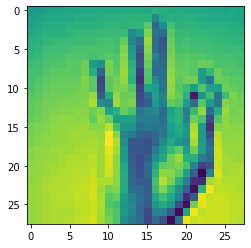

In [ ]:
img= test_images[1]
label_index= model.predict(img.reshape(1,28,28,1)).argmax(axis=-1)[0]
label = labels[label_index]
print(label)
plt.imshow((tf.squeeze(img)))
# plt.imshow(img,cmap=plt.cm.gray)

In [ ]:
import cv2

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


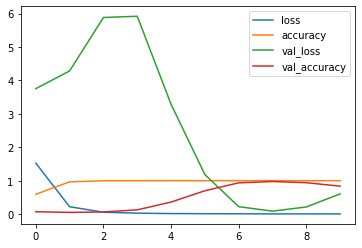

In [ ]:
pd.DataFrame(history.history).plot()